### Import libraries

In [48]:
# import autograd functionalities
import autograd.numpy as np
from autograd import grad as compute_grad   

# import plotting library and other necessities
import matplotlib.pyplot as plt
from matplotlib import gridspec

# import general libraries
import copy
from datetime import datetime 

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

import sys
sys.path.append('../../')
from mlrefined_libraries.deeplearning_library_v1 import superlearn_setup

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import data

In [2]:
# define path to datasets
datapath = '../../mlrefined_datasets/'

csvname = datapath + 'convnet_datasets/feat_face_data.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:,:-1]
y = data[:,-1:]

### Choose a subset of data (to speed up testing)

In [4]:
P = 100
# random subset of full dataset
ind = np.random.permutation(len(y))
x = x[ind[:P],:]
y = y[ind[:P]]

In [6]:
x = x.T
y = y.T

In [7]:
print(np.shape(x))
print(np.shape(y))

(784, 100)
(1, 100)


### Initiate a superlearn instance

In [42]:
# initiate an instance
demo = superlearn_setup.Setup(x,y)

### Choose features

In [43]:
# mlp
demo.choose_features(name='multilayer_perceptron', layer_sizes=[784,10,10,1], activation='relu')

# cnn
#demo.choose_features(name='convolutional_net', layer_sizes=[512,10,10,1], activation='relu')

### Choose normalizer 

In [44]:
# choose a data normalization scheme
demo.choose_normalizer(name = 'standard'
                      )

### Choose cost function

In [45]:
# choose a cost function
demo.choose_cost(name = 'softmax')

### Run gradient descent

In [46]:
# run gradient descent without momentum
demo.fit(max_its = 20, alpha_choice = 10**(-1))

w_init (3,)
kernels (3, 2, 2)
inner_MLP (2,)
inner_MLP_first (785, 10)
inner_MLP_second (11, 10)
model (11, 1)


ValueError: shapes (100,785) and (2,2) not aligned: 785 (dim 1) != 2 (dim 0)

### Plot the results

<IPython.core.display.Javascript object>


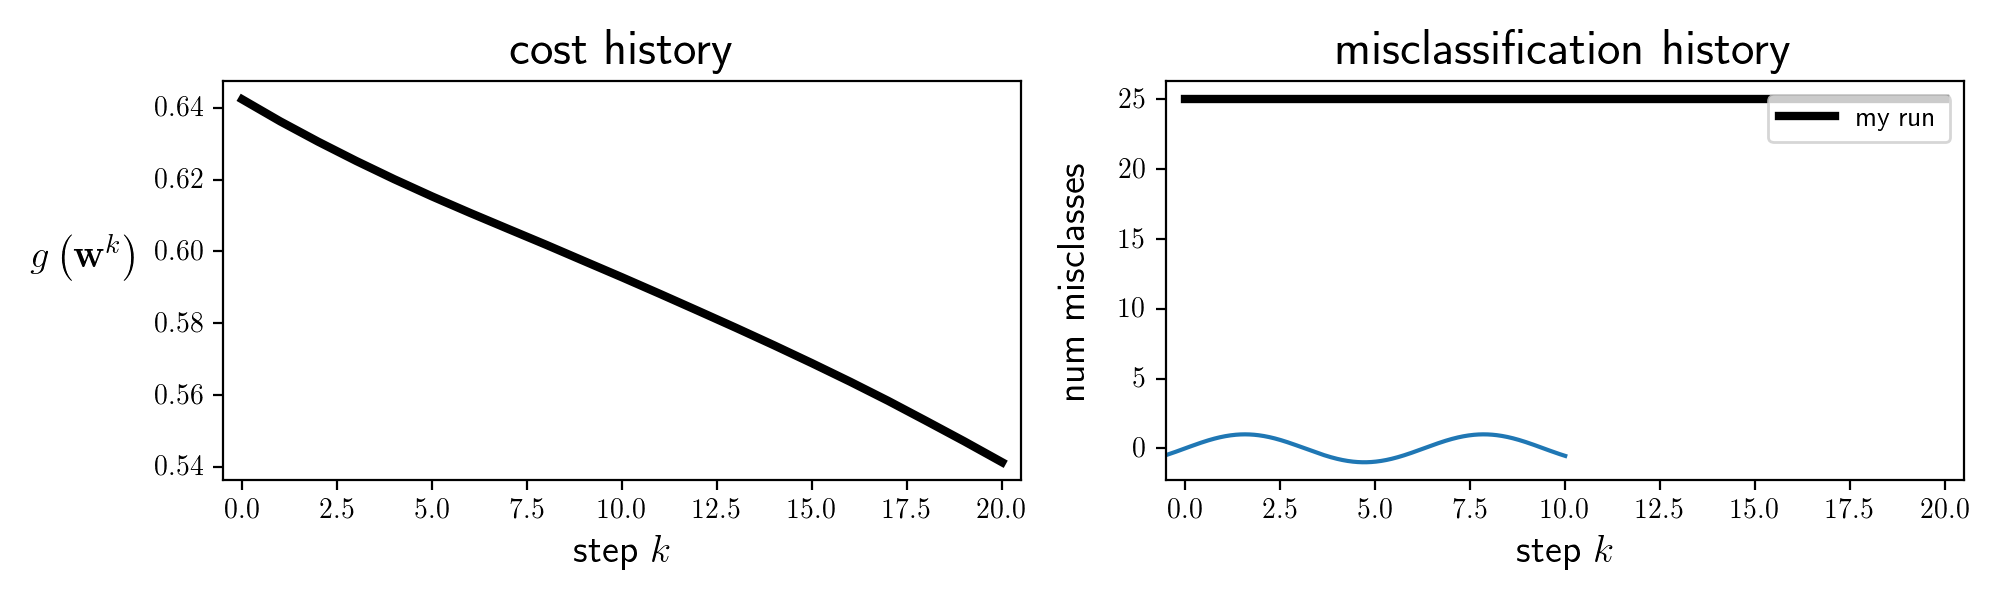

In [13]:
# plot the results
demo.show_histories(start = 0, labels=['my run'])

In [14]:
for k in range(4):
    print(k)

0
1
2
3


In [16]:
a = np.random.randn(3,2,2)

In [19]:
a[2]

array([[ 0.38053236, -1.34099155],
       [ 1.04631043, -0.30473297]])

<IPython.core.display.Javascript object>


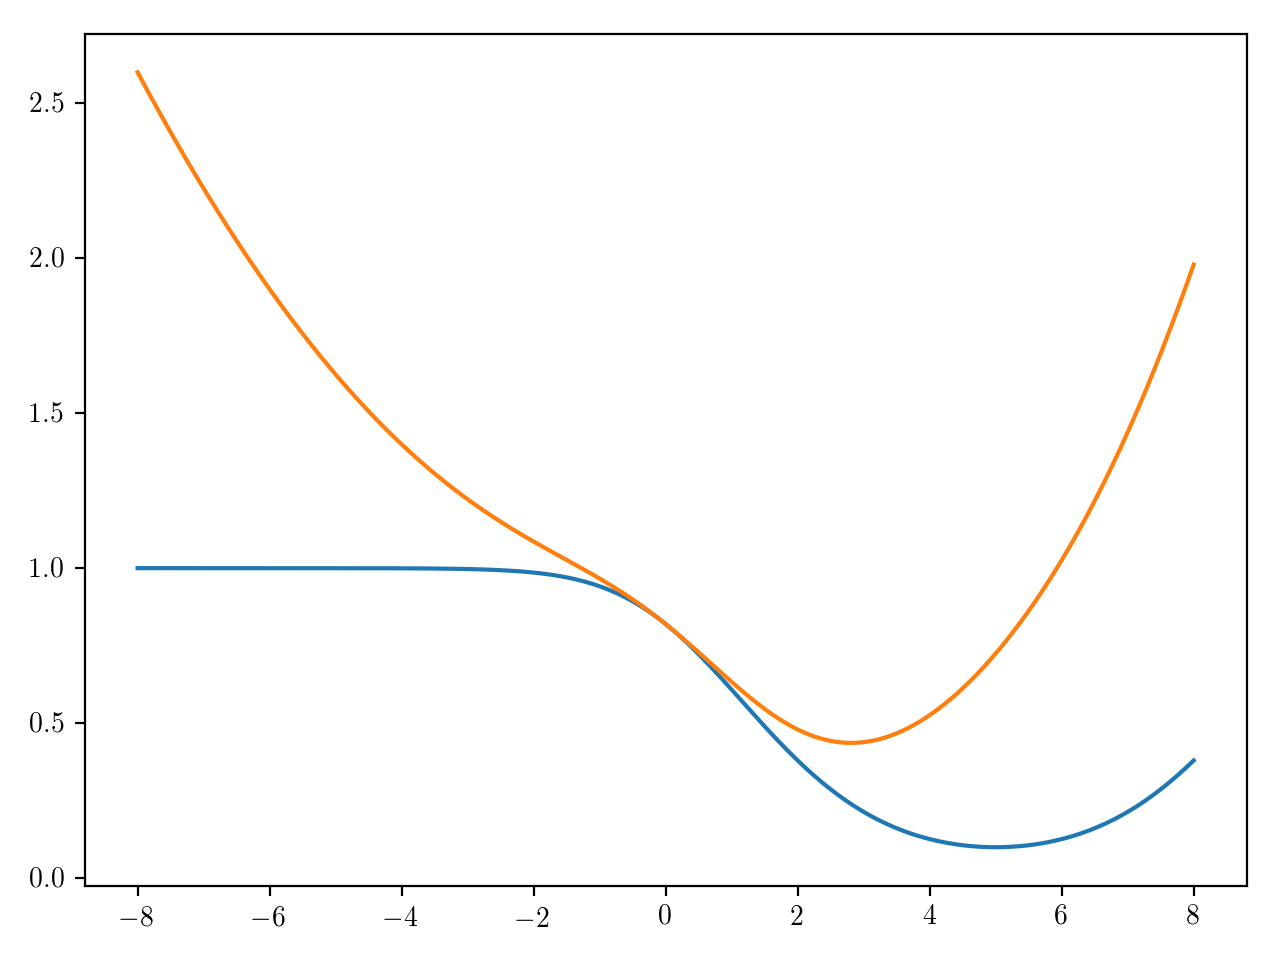

In [81]:
t = np.linspace(-8,8,1000)

lam = .025
f = t**2
g = np.tanh(.1*np.cos(.7*(t-5))+.05*(t-5)**2)
plt.plot(t,g,t,g+lam*f)
plt.show()